# Module 3

In module 3 we look at correlation and regression. Here we provide some tools in Python that can help you with these tasks.

We will begin by importing some of the libraries and modules we've used before, and some new ones.

In [1]:
import numpy
from scipy import stats
import pandas

from sklearn.linear_model import LinearRegression
from matplotlib import pyplot

Sklearn, or scikit-learn ([sklearn documentation](https://scikit-learn.org/stable/index.html)) is a library with tools for predictive analysis and machine learning, and matplotlib ([matplotlib documentation](https://matplotlib.org/)) is a plotting library to help us visualise our data and results.

Let's start with importing our dataset.

In [2]:
full_dataset = pandas.read_csv(r'https://raw.githubusercontent.com/imheidimarais/Engineering-Statistics/master/data/Anscombe.csv')
full_dataset

,x1,y1,x2,y2,x3,y3,x4,y4
0,10,8.04,10,9.14,10,7.46,8,6.58
1,8,6.95,8,8.14,8,6.77,8,5.76
2,13,7.58,13,8.74,13,12.74,8,7.71
3,9,8.81,9,8.77,9,7.11,8,8.84
4,11,8.33,11,9.26,11,7.81,8,8.47
5,14,9.96,14,8.10,14,8.84,8,7.04
6,6,7.24,6,6.13,6,6.08,8,5.25
7,4,4.26,4,3.10,4,5.39,19,12.50
8,12,10.84,12,9.13,12,8.15,8,5.56
9,7,4.82,7,7.26,7,6.42,8,7.91


We could also create a reduced dataset containing only the columns we want to investigate, which in this case are 'x1' and 'y1', but we will not use this now.

In [3]:
reduced_dataset = pandas.DataFrame({'x': full_dataset['x1'],'y': full_dataset['y1']})
reduced_dataset

,x,y
0,10,8.04
1,8,6.95
2,13,7.58
3,9,8.81
4,11,8.33
5,14,9.96
6,6,7.24
7,4,4.26
8,12,10.84
9,7,4.82


In order for our code to work as easily as possible with the tutorial code, we can then create two numpy arrays containing our x and y data:

In [4]:
x = full_dataset['x1'].to_numpy()
y = full_dataset['y1'].to_numpy()

So now we begin with the first step of our analysis, visualising the data.

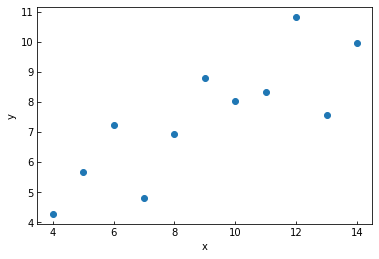

In [5]:
fig = pyplot.figure()
ax = fig.add_subplot()
ax.tick_params(axis='both', direction='in')
ax.set_xlabel('x')
ax.set_ylabel('y')

ax.scatter(x, y)

We see a positive covariance in the scatter plot which is a good sign.

However, if we wanted to visualise all the datasets from our original dataframe together, we could do so with the following piece of code:

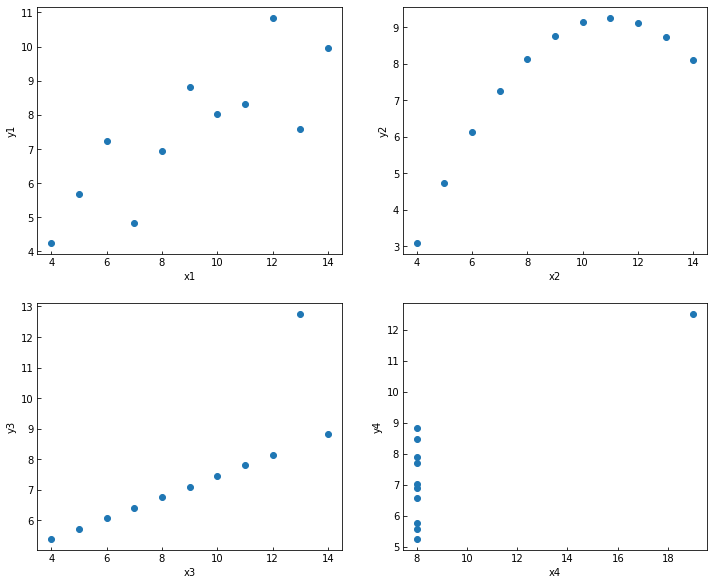

In [6]:
fig = pyplot.figure(figsize=(12,10))
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)

for ax, independent, dependent in [
    (ax1, 'x1', 'y1'), (ax2, 'x2', 'y2'), (ax3, 'x3', 'y3'), (ax4, 'x4', 'y4')
    ]:
    ax.tick_params(axis='both', direction='in')
    ax.set_xlabel(independent)
    ax.set_ylabel(dependent)

    ax.scatter(full_dataset[independent], full_dataset[dependent])

To return to our single dataset, we should begin by checking our assumptions.
We can see from the data that it is qualitative/continuous, the scatter plot suggests a linear relationship, and we see no extreme outliers. So we only really need to test for normality, like we did in module 2, using the Shapiro-Wilk test.

In [7]:
print("x: ", stats.shapiro(x))
print("y: ", stats.shapiro(y))

x:  ShapiroResult(statistic=0.9683912992477417, pvalue=0.8698423504829407)
y:  ShapiroResult(statistic=0.9769276976585388, pvalue=0.9466750621795654)


The Shapiro-Wilk test says we cannot reject the null-Hypothesis so our data probably comes from normally distributed populations.

We can now calculate the correlation coefficient, we'll look primarily at the Pearson coefficient. We can do this with a function from the stats library called perasonr:

In [8]:
r, _ = stats.pearsonr(x, y)
print(r)

0.81642051634484


This function returns the correlation coefficient and a $p$ value, but we will not worry about the $p$ value now. What you see printed above is the correlation coefficient for our data which shows a relatively high correlation.

If we move on to regression now, we will use the sklearn LinearRegression class:

In [9]:
regression = LinearRegression()

The LinearRegression class expects the data given to it in a certain format. One valid format that requires the least explanation is passing both the independent and dependent variables as column vectors (the .reshape() function reorganises the data into as many rows as needed (the *-1* argument) and a single column (the *1* argument).

In [10]:
x_reg = x.reshape(-1, 1)
y_reg = y.reshape(-1,1)

and now we can use the regression tool to fit a regression line to our data using least squares regression:

In [11]:
regression.fit(x_reg, y_reg)
a = regression.intercept_[0]
b = regression.coef_[0][0]
print(f"y = {a} + {b}x")

y = 3.0000909090909094 + 0.5000909090909093x


Printed above you see the model that we get using least squares linear regression.

We can now plot this line of best fit if desired:

In [12]:
y_estimated = a + b*x_reg

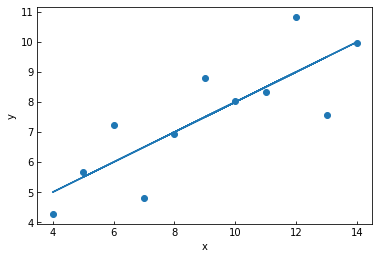

In [13]:
fig = pyplot.figure()
ax = fig.add_subplot()
ax.tick_params(axis='both', direction='in')
ax.set_xlabel('x')
ax.set_ylabel('y')

ax.scatter(x_reg, y_reg)
ax.plot(x_reg, y_estimated)

And we can look at the $r^2$ value for our regression, using either the square of the pearson correlation coefficient or the sklearn .score function.

In [14]:
r_squared = stats.pearsonr(x, y)[0]**2
print("Pearson r squared: ", r_squared)
r_squared = regression.score(x_reg, y_reg)
print("Sklearn r squared: ", r_squared)

Pearson r squared:  0.6665424595087752
Sklearn r squared:  0.6665424595087748


Finally, we look at residual analysis. Here we want to plot the residuals against the dependent variable:

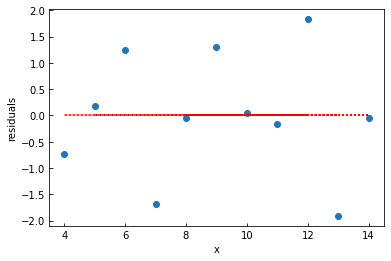

In [15]:
residuals = y_reg - y_estimated # calculate the residuals

fig = pyplot.figure() # generate and format our figure
ax = fig.add_subplot()
ax.tick_params(axis='both', direction='in')
ax.set_xlabel('x')
ax.set_ylabel('residuals')

ax.scatter(x_reg, residuals) # plot the residuals

xaxis = numpy.zeros_like(x_reg)  # make an array to plot the zero line
ax.plot(x_reg, xaxis, ls='dotted', c='red')  # plot the zero line with formatting

Remember that the residual analysis is an important tool when determining if your regression and your data satisfies the necessary assumptions.

Something that we can add is how to perform manual outlier removal, if you see that your data has obvious outliers.

Let's consider the third set of x and y values in the original dataset:

     x      y
0   10   7.46
1    8   6.77
2   13  12.74
3    9   7.11
4   11   7.81
5   14   8.84
6    6   6.08
7    4   5.39
8   12   8.15
9    7   6.42
10   5   5.73


<AxesSubplot:xlabel='x', ylabel='y'>

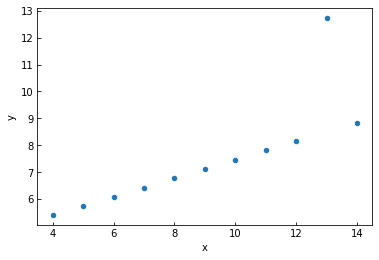

In [16]:
dataset3 = pandas.DataFrame({'x': full_dataset['x3'],'y': full_dataset['y3']})
print(dataset3)

fig = pyplot.figure()
ax = fig.add_subplot()
ax.tick_params(axis='both', direction='in')
ax.set_xlabel('x')
ax.set_ylabel('y')

dataset3.plot(x='x', y='y', kind='scatter', ax=ax)

We see from the scatter plot that the outlier is at an x value of around 13 and a y value above 12. We can locate this entry in our dataset as the entry at index 2. We then use the following command to remove this point:

In [17]:
dataset3_without_outliers = dataset3.drop(dataset3.index[2])

And plot the new data to confirm the outlier has been removed

<AxesSubplot:xlabel='x', ylabel='y'>

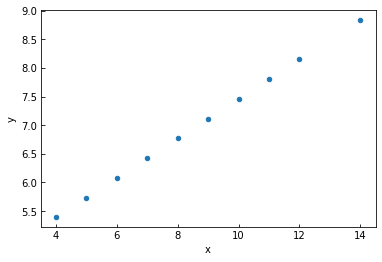

In [18]:
fig = pyplot.figure()
ax = fig.add_subplot()
ax.tick_params(axis='both', direction='in')
ax.set_xlabel('x')
ax.set_ylabel('y')

dataset3_without_outliers.plot(x='x', y='y', kind='scatter', ax=ax)